# Experiment 2
Evaluating correlation between SpotNMatch scores and deconvolution accuracy.

In [7]:
import numpy
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

from scstmatch.matching import SpotNMatch
from scstmatch.data import SingleCellDataset, SpatialTranscriptomicsDataset
from scstmatch.deconvolution import IntegralDeconvolver, GreedySelector
from scstmatch.deconvolution.evaluation import evaluate_jsd, evaluate_rmse
from analysis.cell_based_selector import cell_based_analysis

## Datasets
We will use the same four datasets for this test, each testing a combination of mismatches.
We have excluded the gender mismatch as it tends to contribute very little.

In [8]:
DATA_PATH = "../../../data"
REFERENCE_PATH = f"{DATA_PATH}/reference"
REFERENCE_DATASETS = {
    ("Harvard", "full", "F"): f"{REFERENCE_PATH}/hca_harvard_gender_Female.sc.h5ad",
    ("Harvard", "V1", "F"): f"{REFERENCE_PATH}/hca_harvard_gender_Female_-muscles.sc.h5ad",
    ("Harvard", "V2", "F"): f"{REFERENCE_PATH}/hca_harvard_gender_Female_-endothelial.sc.h5ad",
    ("Sanger", "full", "F"): f"{REFERENCE_PATH}/hca_sanger_gender_Female.sc.h5ad",
    ("Sanger", "V1", "F"): f"{REFERENCE_PATH}/hca_sanger_gender_Female_-muscles.sc.h5ad",
    ("Sanger", "V2", "F"): f"{REFERENCE_PATH}/hca_sanger_gender_Female_-endothelial.sc.h5ad",
}

TARGET_PATH = f"{DATA_PATH}/st"
TARGET_DATASETS = {
    ("Harvard", "full", "F1"): f"{TARGET_PATH}/hca_harvard_donor_H6.st.h5ad",
    ("Harvard", "V1", "F1"): f"{TARGET_PATH}/hca_harvard_donor_H6_-muscles.st.h5ad",
    ("Harvard", "V2", "F1"): f"{TARGET_PATH}/hca_harvard_donor_H6_-endothelial.st.h5ad",
    ("Sanger", "full", "F1"): f"{TARGET_PATH}/hca_sanger_donor_D5.st.h5ad",
    ("Sanger", "V1", "F1"): f"{TARGET_PATH}/hca_sanger_donor_D5_-muscles.st.h5ad",
    ("Sanger", "V2", "F1"): f"{TARGET_PATH}/hca_sanger_donor_D5_-endothelial.st.h5ad",
    ("Harvard", "full", "F2"): f"{TARGET_PATH}/hca_harvard_donor_H7.st.h5ad",
    ("Harvard", "V1", "F2"): f"{TARGET_PATH}/hca_harvard_donor_H7_-muscles.st.h5ad",
    ("Harvard", "V2", "F2"): f"{TARGET_PATH}/hca_harvard_donor_H7_-endothelial.st.h5ad",
    ("Sanger", "full", "F2"): f"{TARGET_PATH}/hca_sanger_donor_D1.st.h5ad",
    ("Sanger", "V1", "F2"): f"{TARGET_PATH}/hca_sanger_donor_D1_-muscles.st.h5ad",
    ("Sanger", "V2", "F2"): f"{TARGET_PATH}/hca_sanger_donor_D1_-endothelial.st.h5ad",
}

# Precomputed gene selection
GENES = ['ABCA6', 'ABCA8', 'ABCA9', 'ACACB', 'ACSL1', 'ACTA2', 'ADGRB3', 'ANK3',
         'ANKRD44', 'ANO2', 'ARHGAP15', 'BCL2', 'BICC1', 'BTNL9', 'CADM2',
         'CADPS', 'CARMIL1', 'CARMN', 'CCND3', 'CD163', 'CDC42SE2', 'CDH19',
         'CMYA5', 'CTNNA3', 'DCN', 'DLC1', 'DOCK2', 'EGFL7', 'EGFLAM', 'EHBP1',
         'ELMO1', 'EPS8', 'ERBB4', 'FHL2', 'FKBP5', 'FMN1', 'FRMD3', 'FRMD4B',
         'FYN', 'GNAQ', 'GPAM', 'GRIP1', 'GUCY1A2', 'ID1', 'IKZF1', 'IQGAP2',
         'KCNAB1', 'LAMA2', 'LDB2', 'LINC02248', 'LIPE-AS1', 'LRMDA', 'MAPK10',
         'MGST1', 'MLIP', 'MYBPC3', 'MYH11', 'MYH6', 'MYL7', 'NEAT1', 'NEGR1',
         'NR2F2-AS1', 'NRXN1', 'NRXN3', 'NTRK3', 'PAM', 'PARP8', 'PDE3B',
         'PDE4DIP', 'PDGFRB', 'PID1', 'PLA2G5', 'PLIN1', 'PNPLA2', 'PRKG1',
         'PTPRB', 'PTPRC', 'RABGAP1L', 'RBM47', 'RGS5', 'RORA', 'RYR2', 'SCN7A',
         'SGCD', 'SKAP1', 'SLC8A1', 'SLIT3', 'SOX5', 'ST6GALNAC3', 'SYNE1',
         'TBXAS1', 'TRDN-AS1', 'TTN', 'VWF', 'ZFHX3']

## Generate Table Data
We will generate a scatter plot grid of the separate results.

In [9]:
def correlate_results(reference, target):
    scores = SpotNMatch().match(reference, target)[3]
    ref = reference.copy_with(reference.anndata[:, GENES].copy())
    tgt = target.copy_with(target.anndata[:, GENES].copy())
    selector = GreedySelector()
    deconvolver = IntegralDeconvolver(ref, selector=selector)
    predicted = deconvolver.deconvolve(tgt)
    accuracy = evaluate_jsd(tgt, predicted)
    return scores, accuracy, predicted

results = {}
predicteds = {}

for reference_key, reference_path in REFERENCE_DATASETS.items():
    reference = SingleCellDataset.read(reference_path)
    for target_key, target_path in TARGET_DATASETS.items():
        target = SpatialTranscriptomicsDataset.read(target_path)
        score, accuracy, predicted = correlate_results(reference, target)
        results[(reference_key, target_key)] = (score, accuracy)
        predicteds[(reference_key, target_key)] = predicted

0.019060s	init
5.779694s	load
0.783278s	hvg
3.147883s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.018403s	init
5.326879s	load
0.753838s	hvg
2.802681s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.018283s	init
5.962056s	load
0.736870s	hvg
3.196043s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.021377s	init
5.795882s	load
0.620372s	hvg
3.001827s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.018721s	init
5.447145s	load
0.582657s	hvg
2.703924s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017933s	init
5.814109s	load
0.637261s	hvg
2.945999s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.018568s	init
5.627589s	load
0.711091s	hvg
2.955907s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.019104s	init
5.901859s	load
0.690554s	hvg
3.028594s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017004s	init
5.308325s	load
0.762556s	hvg
2.773313s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.019452s	init
5.769630s	load
0.519140s	hvg
3.120177s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.018184s	init
5.850592s	load
0.610167s	hvg
2.865021s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.018543s	init
6.054732s	load
0.638823s	hvg
2.944046s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.007925s	init
2.202157s	load
0.796471s	hvg
1.198880s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009091s	init
2.342427s	load
0.773507s	hvg
1.149833s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.008774s	init
2.097463s	load
0.670582s	hvg
1.127626s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009571s	init
2.242510s	load
0.609167s	hvg
1.124614s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.010042s	init
2.236771s	load
0.597160s	hvg
1.140712s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009491s	init
2.056017s	load
0.594993s	hvg
1.129213s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009752s	init
2.142208s	load
0.702024s	hvg
1.273029s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009306s	init
2.306061s	load
0.678646s	hvg
1.142596s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009402s	init
2.183499s	load
0.670371s	hvg
1.106359s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009408s	init
2.200094s	load
0.618350s	hvg
1.161066s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009484s	init
2.386685s	load
0.613301s	hvg
1.162548s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009110s	init
2.201020s	load
0.602335s	hvg
1.070229s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.016906s	init
5.395200s	load
0.722208s	hvg
2.712524s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.019176s	init
5.280366s	load
0.672247s	hvg
2.519655s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.018023s	init
5.355783s	load
0.684786s	hvg
2.618193s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.019188s	init
5.453212s	load
0.650308s	hvg
2.561114s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.019777s	init
5.463454s	load
0.599845s	hvg
2.397555s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.019961s	init
5.300335s	load
0.628044s	hvg
2.461428s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017749s	init
5.324986s	load
0.777503s	hvg
2.507017s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.020290s	init
5.442388s	load
0.691746s	hvg
2.601878s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.020964s	init
5.571629s	load
0.600095s	hvg
2.675300s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.019574s	init
5.757215s	load
0.608700s	hvg
2.593404s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.019881s	init
5.867578s	load
0.587566s	hvg
2.517138s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017699s	init
5.174794s	load
0.599706s	hvg
2.410495s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.014862s	init
1.655235s	seed H
5.402978s	rank genes
0.007411s	seed W
1.645881s	NMF (3 it)
1.723474s	save
0.757956s	hvg
2.555869s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017491s	init
3.243549s	load
0.695534s	hvg
2.573046s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017490s	init
3.179696s	load
0.680177s	hvg
2.509449s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017407s	init
3.439299s	load
0.637375s	hvg
2.769574s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017786s	init
3.756142s	load
0.627037s	hvg
2.732433s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017027s	init
3.305126s	load
0.634397s	hvg
2.758710s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017976s	init
3.438868s	load
0.691952s	hvg
2.452438s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.016188s	init
3.456816s	load
0.737276s	hvg
2.534553s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017522s	init
3.548814s	load
0.708885s	hvg
2.605795s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017318s	init
3.437859s	load
0.610363s	hvg
2.560897s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.018112s	init
3.518393s	load
0.649668s	hvg
2.756879s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.017313s	init
3.527392s	load
0.652696s	hvg
2.964611s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.008918s	init
1.231717s	load
0.797311s	hvg
0.800192s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009074s	init
1.374521s	load
0.679998s	hvg
0.786928s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009087s	init
1.338725s	load
0.695142s	hvg
0.781262s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.008197s	init
1.332708s	load
0.626267s	hvg
0.815487s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.008732s	init
1.356421s	load
0.595415s	hvg
0.826909s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.008713s	init
1.335537s	load
0.625890s	hvg
0.772251s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.008746s	init
1.347551s	load
0.662368s	hvg
0.986041s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.008790s	init
1.295088s	load
0.672628s	hvg
0.789719s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009006s	init
1.278528s	load
0.709631s	hvg
0.774700s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009280s	init
1.273791s	load
0.617803s	hvg
0.819251s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.008801s	init
1.220933s	load
0.592804s	hvg
0.755606s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.009146s	init
1.311121s	load
0.659922s	hvg
0.958182s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.012618s	init
3.189261s	load
0.788316s	hvg
2.508323s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.015958s	init
3.235777s	load
0.694994s	hvg
2.457529s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.015905s	init
3.189733s	load
0.696323s	hvg
2.557780s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.016003s	init
3.249409s	load
0.615613s	hvg
2.351545s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.015760s	init
3.135441s	load
0.590639s	hvg
2.329307s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.015858s	init
3.237776s	load
0.622338s	hvg
2.649170s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.016306s	init
3.241968s	load
0.666079s	hvg
2.354202s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.015948s	init
3.095335s	load
0.648032s	hvg
2.328646s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.016092s	init
3.111056s	load
0.689708s	hvg
2.449569s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.016745s	init
3.342822s	load
0.631175s	hvg
2.486074s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.015293s	init
3.260889s	load
0.593906s	hvg
2.289562s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

0.015986s	init
3.201201s	load
0.613627s	hvg
2.481105s	nnls


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

In [10]:
results.keys()

dict_keys([(('Harvard', 'full', 'F'), ('Harvard', 'full', 'F1')), (('Harvard', 'full', 'F'), ('Harvard', 'V1', 'F1')), (('Harvard', 'full', 'F'), ('Harvard', 'V2', 'F1')), (('Harvard', 'full', 'F'), ('Sanger', 'full', 'F1')), (('Harvard', 'full', 'F'), ('Sanger', 'V1', 'F1')), (('Harvard', 'full', 'F'), ('Sanger', 'V2', 'F1')), (('Harvard', 'full', 'F'), ('Harvard', 'full', 'F2')), (('Harvard', 'full', 'F'), ('Harvard', 'V1', 'F2')), (('Harvard', 'full', 'F'), ('Harvard', 'V2', 'F2')), (('Harvard', 'full', 'F'), ('Sanger', 'full', 'F2')), (('Harvard', 'full', 'F'), ('Sanger', 'V1', 'F2')), (('Harvard', 'full', 'F'), ('Sanger', 'V2', 'F2')), (('Harvard', 'V1', 'F'), ('Harvard', 'full', 'F1')), (('Harvard', 'V1', 'F'), ('Harvard', 'V1', 'F1')), (('Harvard', 'V1', 'F'), ('Harvard', 'V2', 'F1')), (('Harvard', 'V1', 'F'), ('Sanger', 'full', 'F1')), (('Harvard', 'V1', 'F'), ('Sanger', 'V1', 'F1')), (('Harvard', 'V1', 'F'), ('Sanger', 'V2', 'F1')), (('Harvard', 'V1', 'F'), ('Harvard', 'full',

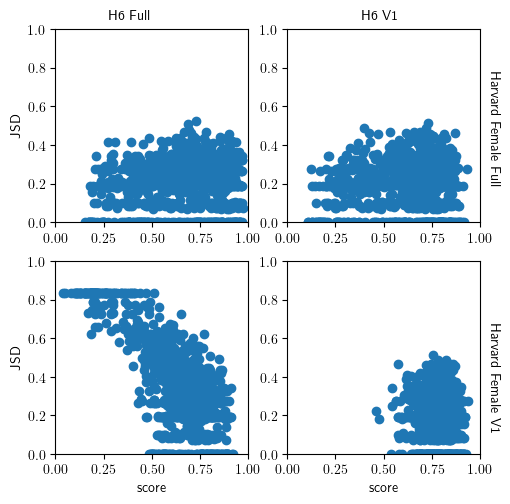

In [15]:
figure, grid = plot.subplots(2, 2, figsize=(5,5))
figure.subplots_adjust( 0.1, 0.1, 0.95, 0.95)

for ref, index in zip(["Harvard Female Full", "Harvard Female V1"], range(2)):
    figure.text(0.99,(1 - (index * (1 / 2) + (1/4))), ref, rotation=-90, va="center", ha="right")

for ref, index in zip(["H6 Full", "H6 V1"], range(2)):
    figure.text((index * (1 / 2) + (1/4)), 0.99, ref, ha="center", va="top")

for i in range(2):
    grid[i][0].set_ylabel("JSD")

for i in range(2):
    grid[1][i].set_xlabel("score")

for ref, axes in zip(REFERENCE_DATASETS.keys(), grid):
    for tgt, ax in zip(TARGET_DATASETS.keys(), axes):
        score, accuracy = results[(ref, tgt)]

        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.scatter(score,accuracy)

figure.savefig("../../output/spot_accuracy_correlation_excerpt.pdf")

array([[ 1.        , -0.57934162],
       [-0.57934162,  1.        ]])

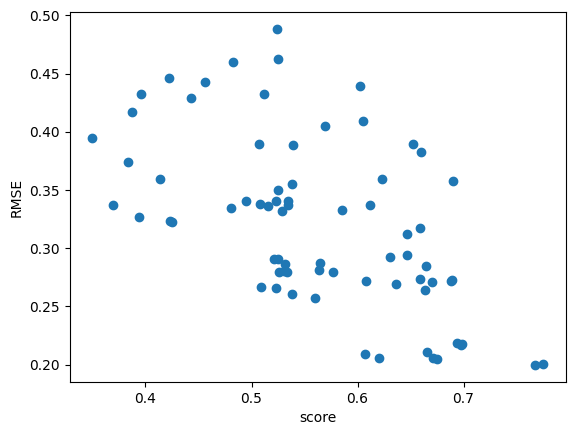

In [12]:
scores = []
accuracies = []

for key, (score, accuracy) in results.items():
    scores.append(score.mean())
    accuracies.append(accuracy.mean())

plot.xlabel("score")
plot.ylabel("RMSE")
plot.scatter(scores, accuracies)
np.corrcoef(scores, accuracies)

In [13]:
plot.rcParams.update({
    "text.usetex": True,
})

/var/folders/2j/mgb23mj938j7lcpf33rzf5m40000gp/T/ipykernel_9069/2544421831.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


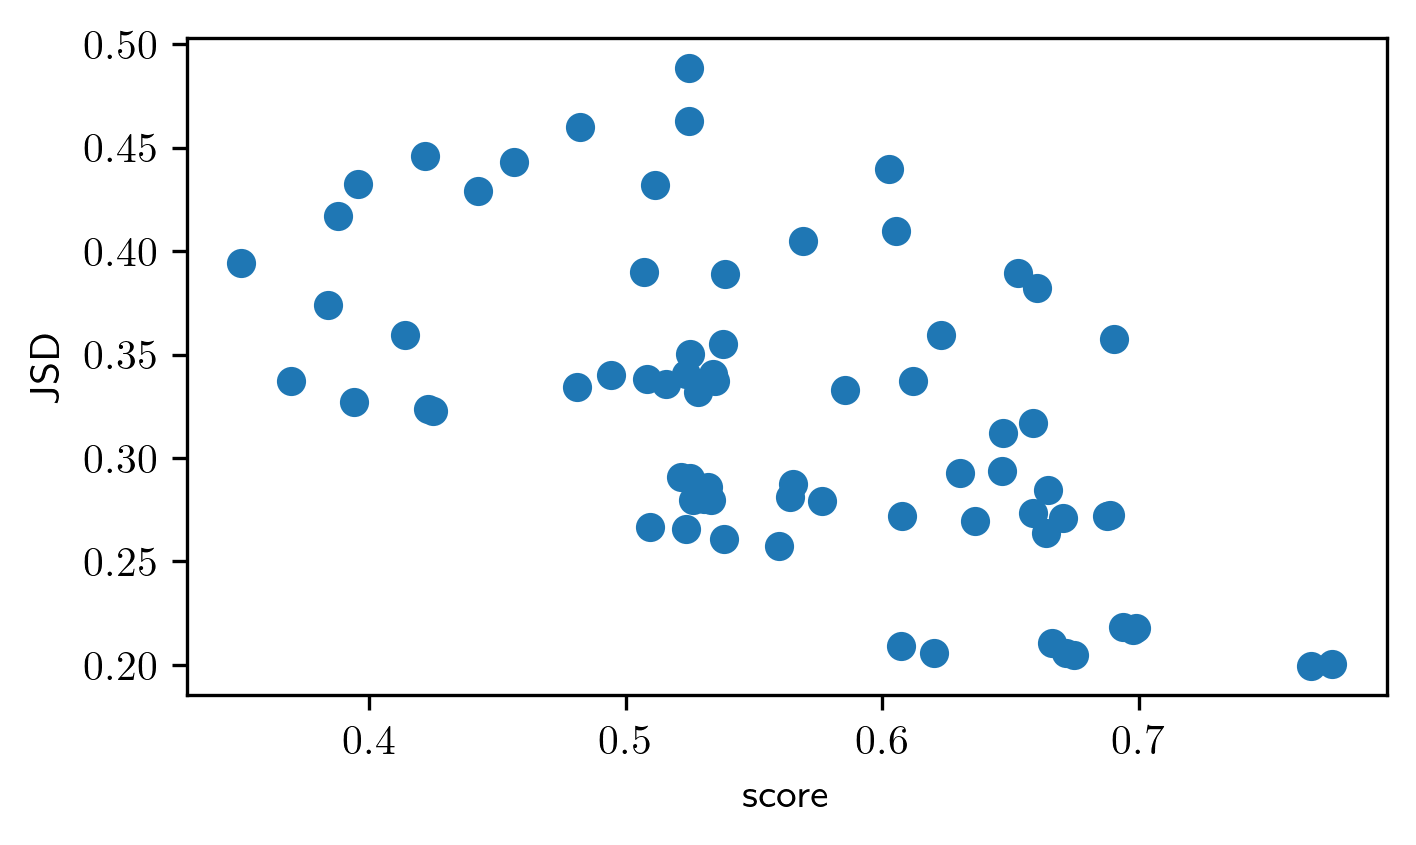

In [16]:
fig = plot.figure(figsize=(5, 3), dpi=300)
fig.subplots_adjust(left=0.15, right=0.95, bottom=0.15)
plt = fig.add_subplot()
plt.scatter(scores, accuracies)
plt.set_xlabel("score")
plt.set_ylabel("JSD")
#plt.set_title("filter-genes = none (HCA dataset)")
fig.show()
fig.savefig("../../output/accuracy_correlation.pdf")